In [1]:
include("../SwissArmyKnife.jl")
import Main.SwissArmyKnife as SAK# In order to have it without the prefix "Main."
using CSV
using DataFrames
using Plots
using GMT

Bozza di funzione per la rotazione delle velocita'

In [2]:
min_years=4.5

4.5

D'Agostino et al., 2008

In [3]:
DfDA=CSV.read("DAgostino2008.dat", DataFrame)
TminMaxString=DfDA."TMin-Tmax"
# Extract the minimum and maximum times
Tmin=Float64[]
Tmax=Float64[]
for i in 1:size(DfDA,1)
    parts=split(TminMaxString[i],"-")
    first_num = parse(Float64, parts[1])
    last_num = parse(Float64, parts[2]) 
    push!(Tmin,first_num)
    push!(Tmax,last_num)
end
DfDA.Tmin=Tmin
DfDA.Tmax=Tmax
DfDA.ΔT=Tmax .- Tmin
first(DfDA,5)

# Filter at min_years years
cond=DfDA.ΔT .> min_years
DfDAFlt=DfDA[cond,:]

# Convert to a Matrix
DfDAFltM=Matrix(DfDAFlt[:,[1,2,3,4,5,6]])
DfDAFltM=hcat(DfDAFltM,zeros(size(DfDAFltM,1)))

first(DfDAFlt,3)

Row,Lon,Lat,Ve,Vn,Se,Sn,ID,DT,TMin-Tmax,NET,Tmin,Tmax,ΔT
,Float64,Float64,Float64,Float64,Float64,Float64,String7,Float64,String15,String15,Float64,Float64,Float64
1,28.6419,44.0865,-0.2,-0.1,0.16,0.16,AGIG,6.06,2013.45-2019.51,NIEP,2013.45,2019.51,6.06
2,21.409,38.624,-11.11,-7.0,0.2,0.2,AGRI,8.38,2010.74-2019.12,METRICA,2010.74,2019.12,8.38
3,27.2488,42.6996,-0.1,-0.8,0.16,0.21,AITO,10.29,2009.22-2019.51,BULGARIA,2009.22,2019.51,10.29


In [4]:
range_plot=[0,30,10,50]
SAK.plot_vector_map_S(range_plot, 5e-3, DfDAFltM,projection_s="A10/30/3.5i")
GMT.scatter!(DfDAFltM[:,1],DfDAFltM[:,2],markersize=1e-1 .* ones(size(DfDAFltM,1)), fill="red")
GMT.plot!([NaN],[NaN],show=true)

Master dataset

In [5]:
# Path to input Dataset
DFmasterName="/mnt/c/Users/rikin/Desktop/Block_modeling/GNSSVeloFields/FltDatasets/FltDatasetEurasiaFixed.csv";

DFmaster = CSV.read(DFmasterName,DataFrame);
DFmaster.Site = String.(DFmaster.Site)
first(DFmaster,3)

Row,Long,Lat,E_Rate,N_Rate,U_Rate,σ_E,σ_N,σ_U,ρ,Site
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String
1,11.5901,48.1411,0.201,0.146,-0.019,0.02,0.045,0.307,0.0,0256_GPS
2,12.5657,48.8742,0.321,0.139,0.814,0.017,0.038,0.304,0.0,0257_GPS
3,11.5061,48.5321,0.267,0.268,0.04,0.02,0.047,0.321,0.0,0258_GPS


Rototranslate the datasets

In [6]:

MasterDataset=DFmaster[:,[1,2,3,4,5,6,7,8,10]]
Slavedataset=DfDAFlt[:,1:7]
Slavedataset.Vu=NaN .* ones(size(Slavedataset,1))
Slavedataset.Su=NaN .* ones(size(Slavedataset,1))
Slavedataset=Slavedataset[:,[1,2,3,4,8,5,6,9,7]]

MasterDataset, Slavedataset, MasterIndices, SlaveIndices = SAK.RotateVeloField(MasterDataset, Slavedataset, 1, components=2)

(2841×9 DataFrame
  Row │ Long      Lat       E_Rate      N_Rate      U_Rate      σ_E        σ_N ⋯
      │ Float64   Float64   Float64     Float64     Float64     Float64    Flo ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  11.5901   48.1411    0.201       0.146     -0.019      0.02       0.0 ⋯
    2 │  12.5657   48.8742    0.321       0.139      0.814      0.017      0.0
    3 │  11.5061   48.5321    0.267       0.268      0.04       0.02       0.0
    4 │  10.8934   48.3713    0.102       0.345     -0.482      0.023      0.0
    5 │  13.4433   48.5684    0.267       0.176      0.009      0.02       0.0 ⋯
    6 │  12.3502   48.1951    0.173       0.314      0.239      0.018      0.0
    7 │  12.9327   48.4286    0.366       0.13       0.298      0.021      0.0
    8 │  12.1612   48.5397    0.183       0.139      0.31       0.019      0.0
  ⋮   │    ⋮         ⋮          ⋮           ⋮           ⋮           ⋮          ⋱
 2835 │ 354.261    41.

In [16]:
# Look at the common sites
SAK.plot_vector_map_S(range_plot, 5e-2, Matrix(MasterDataset[MasterIndices,[1,2,3,4,6,7]]),projection_s="M15c",color="red")
SAK.plot_vector_map_S(range_plot, 5e-2, Matrix(Slavedataset[SlaveIndices,[1,2,3,4,6,7]]),color="blue",Are_you_Overwriting=true)
GMT.plot!([NaN],[NaN],name="temp.pdf")


SAK.plot_vector_map_S(range_plot, 5e-1, Matrix(Slavedataset[SlaveIndices,[1,2,10,11]]),projection_s="M15c",color="red")
SAK.plot_vector_map_S(range_plot, 5e-1, Matrix(Slavedataset[SlaveIndices,[1,2,3,4]]),color="blue",Are_you_Overwriting=true)
SAK.plot_vector_map_S(range_plot, 5e-1, Matrix(MasterDataset[MasterIndices,[1,2,3,4]]),color="black",Are_you_Overwriting=true)
GMT.plot!([NaN],[NaN],name="temp.pdf")

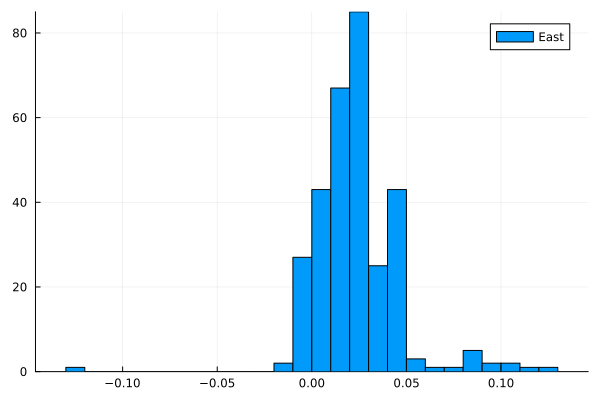

In [13]:
Plots.histogram(Slavedataset[:,3]-Slavedataset[:,10],label="East")

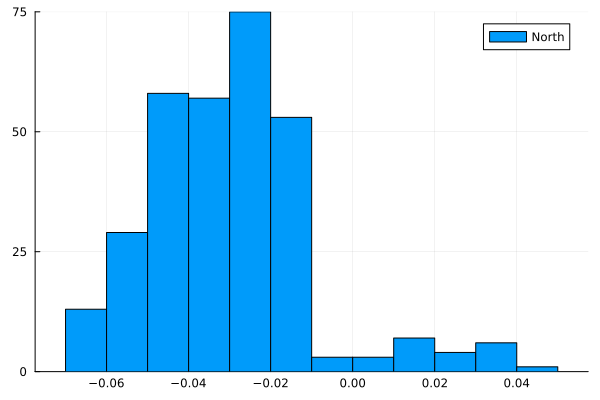

In [14]:
Plots.histogram(Slavedataset[:,4]-Slavedataset[:,11],label="North")